Audio Classification using Machine Learning
Exploratory Data Analysis (EDA)

In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename="dog_bark.wav"

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

C:\Users\parth\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Testing a sample audio to see its feature

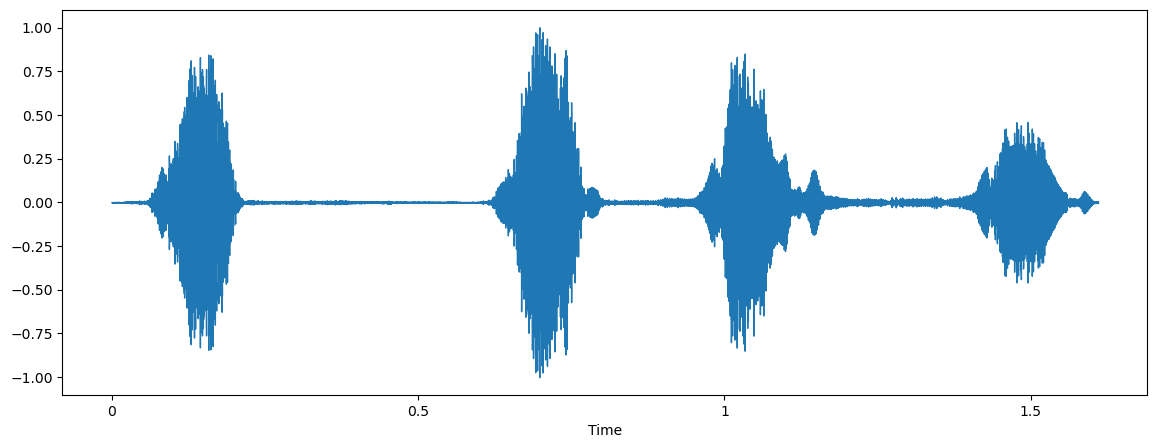

In [5]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

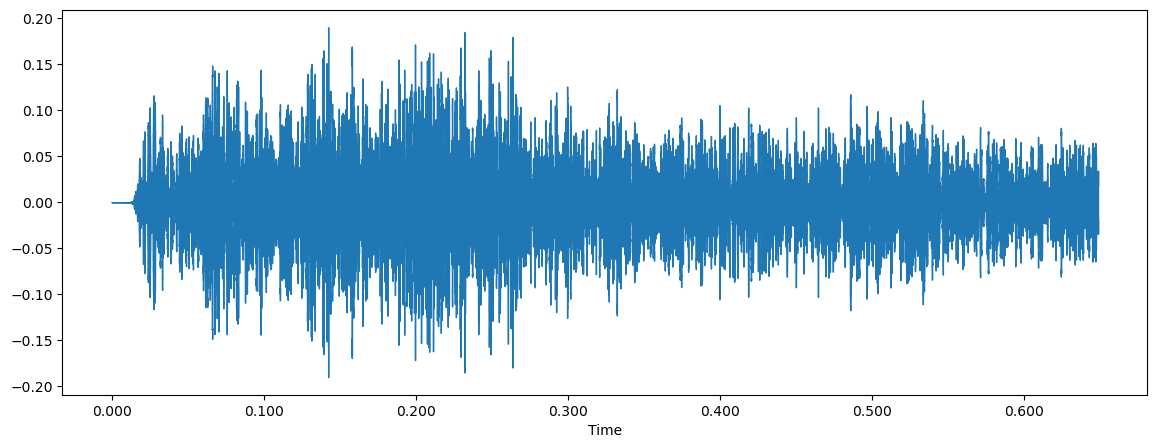

In [6]:
### Car horn
filename1='fold10/100648-1-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

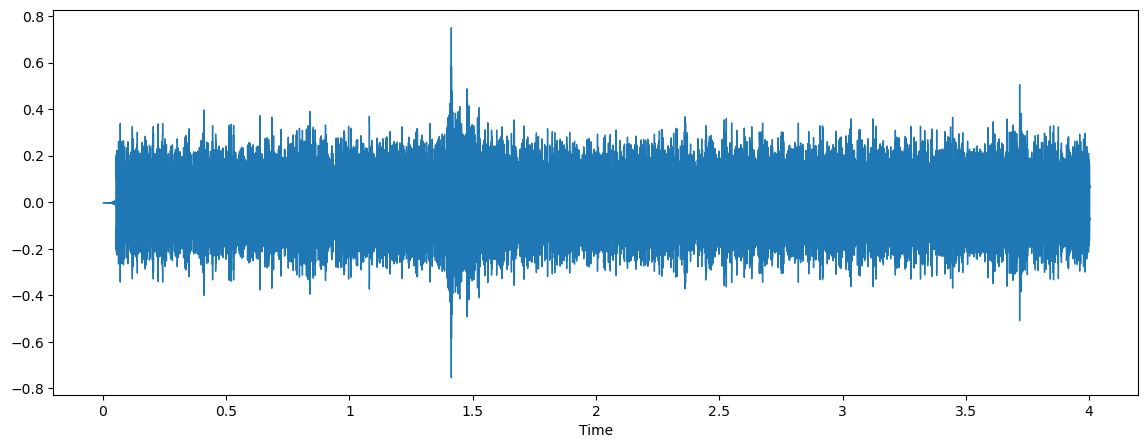

In [7]:
### Air condistioner
filename1='fold5/100852-0-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)


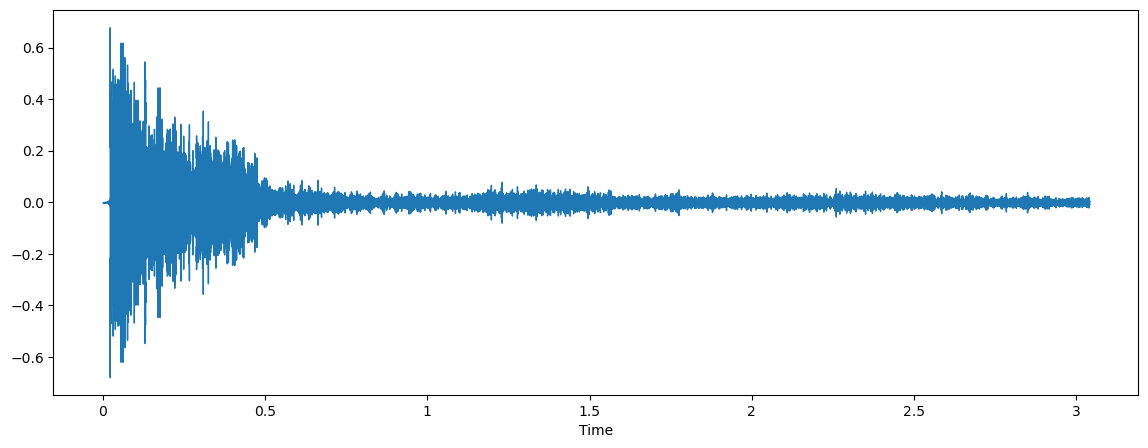

In [8]:
###Gun shot
filename1='fold9/87562-6-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

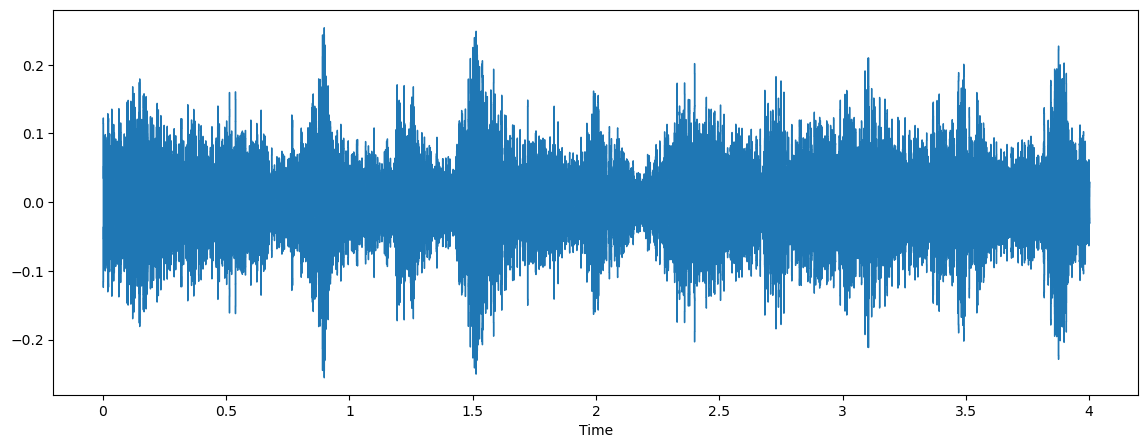

In [9]:
##Street music
filename1='fold7/101848-9-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

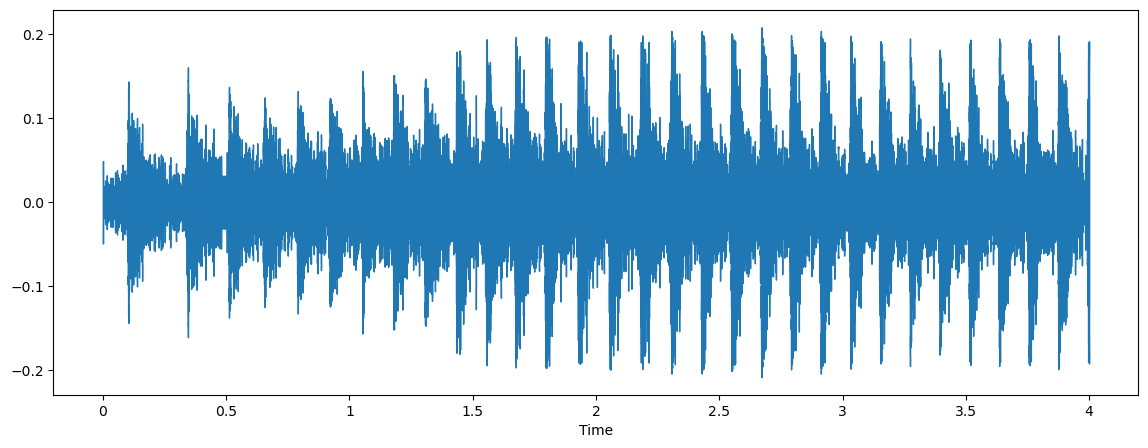

In [10]:
##Jackhammer
filename1='fold5/90013-7-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

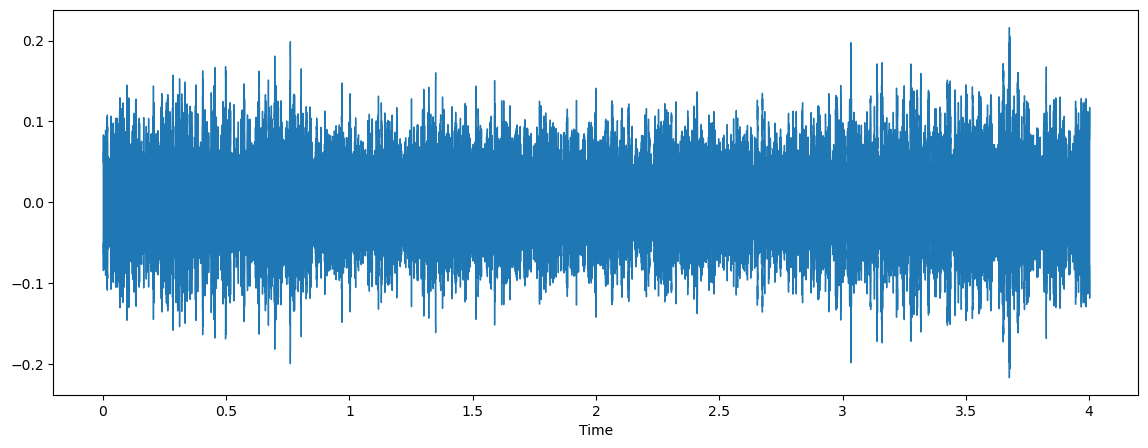

In [11]:
##seiren 
filename1='fold7/102853-8-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

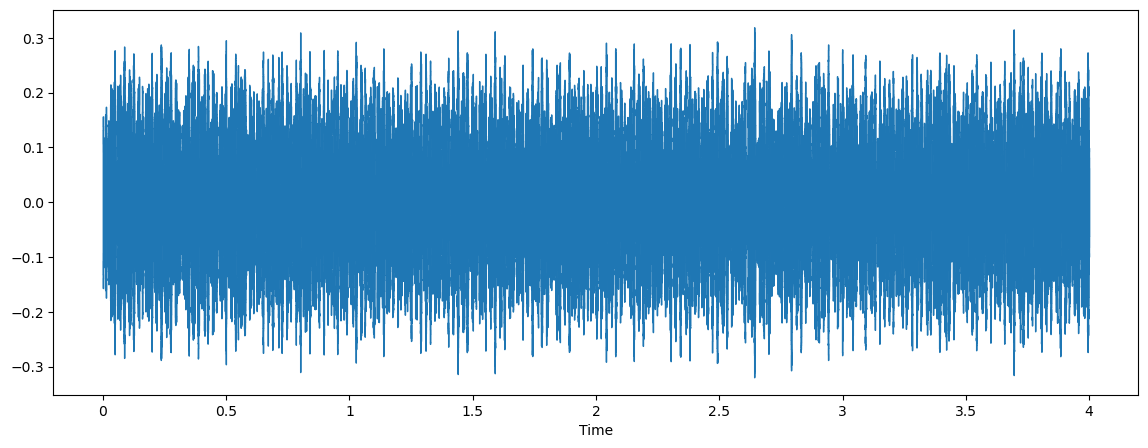

In [12]:
##engine_idling
filename1='fold10/102857-5-0-1.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

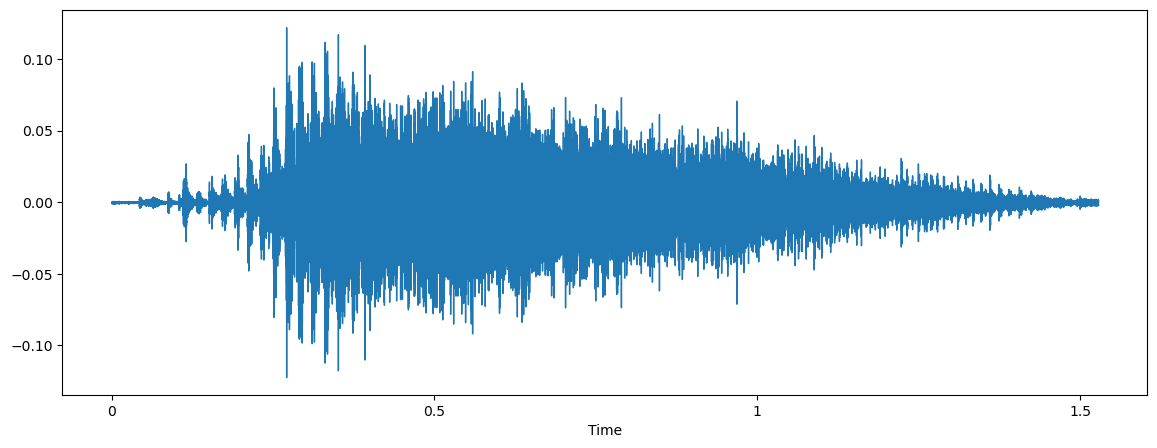

In [13]:
##Driling 
filename1='fold3/95562-4-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

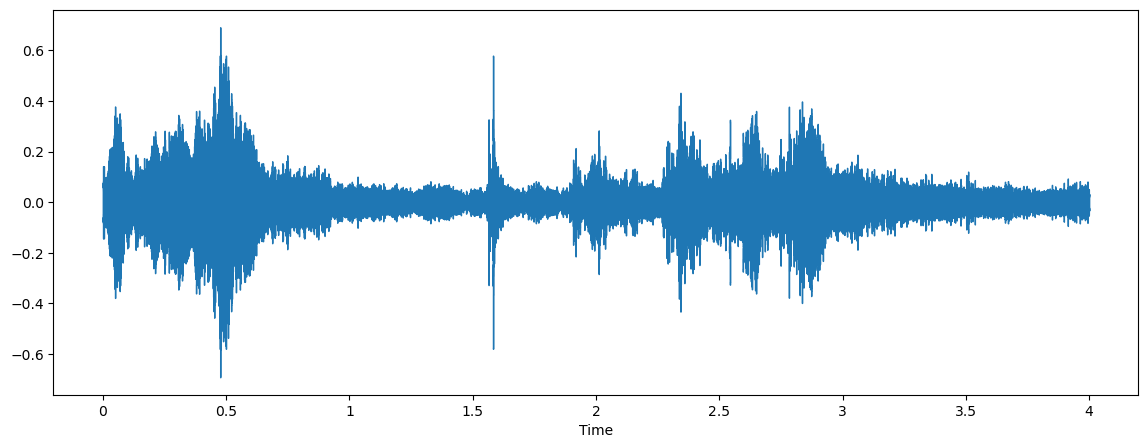

In [14]:
##(children_playing)
filename1='fold1/97317-2-0-23.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

In [15]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [16]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


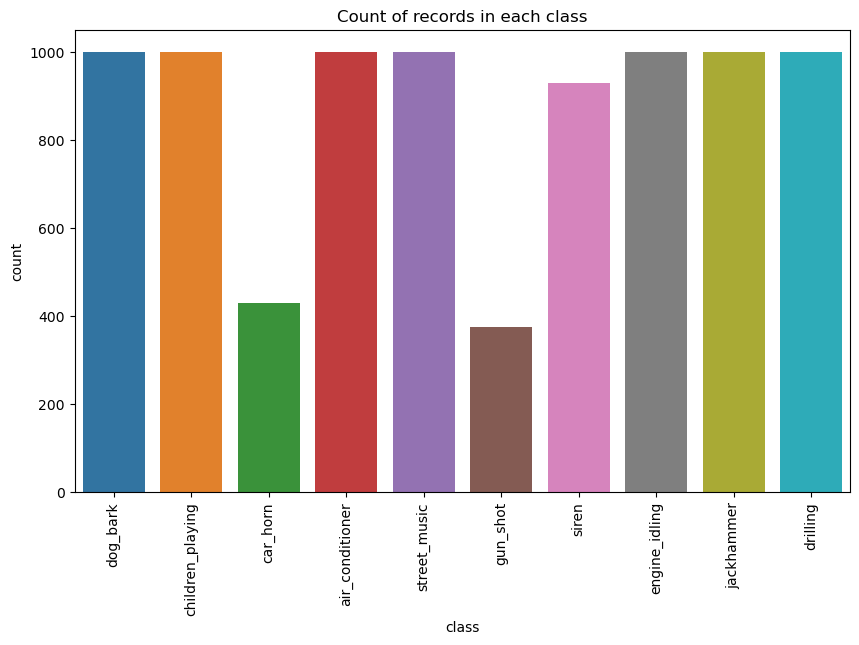

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(metadata['class'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

Data Preprocessing

In [18]:
### Let's read a sample audio using librosa
import librosa
audio_file_path="fold9/99500-2-0-50.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [19]:
print(librosa_audio_data)

[-0.00080088 -0.00565074 -0.00804093 ... -0.00591588 -0.00585154
 -0.00574518]


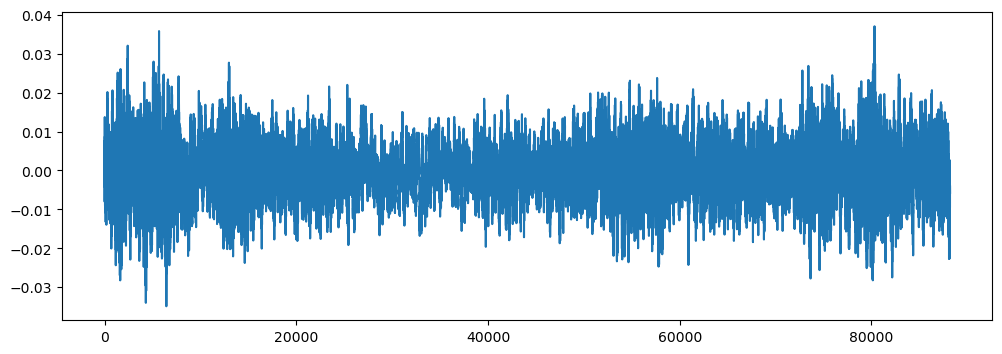

In [20]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification

In [21]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [22]:
mfccs

array([[-393.09543  , -363.8735   , -355.41998  , ..., -351.19052  ,
        -351.0628   , -365.52786  ],
       [ 105.773926 ,  105.112045 ,  108.04115  , ...,   93.0939   ,
          94.74643  ,   96.56325  ],
       [ -54.070374 ,  -55.89019  ,  -56.171165 , ...,  -56.920883 ,
         -56.515408 ,  -45.624695 ],
       ...,
       [  -3.3258154,    2.1221712,    6.487034 , ...,    3.3848817,
           5.372374 ,    1.8012457],
       [  -7.3697586,   -6.962432 ,  -11.622414 , ...,   -3.932563 ,
          -6.241886 ,   -5.946069 ],
       [   8.804246 ,   10.35442  ,    7.3306155, ...,    5.1734204,
           6.6002655,    1.4833447]], dtype=float32)

In [23]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='audio/'
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

We are creating a function for feature extratoin having input as file and output as mfcc features

In [24]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [25]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [02:29, 25.03it/s]C:\Users\parth\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8323it [05:29, 35.17it/s]C:\Users\parth\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\parth\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [05:43, 25.46it/s]


In [26]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-217.35526, 70.22339, -130.38527, -53.282898,...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  children_playing
3  [-413.89984, 101.66373, -35.42945, 53.036358, ...  children_playing
4  [-446.60352, 113.68541, -52.402206, 60.302044,...  children_playing

In [27]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [28]:
X.shape

(8732, 40)

In [29]:
## Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [30]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
X_train.shape

(6985, 40)

In [33]:
X_test.shape

(1747, 40)

In [34]:
y_train.shape

(6985, 10)

In [35]:
y_test.shape

(1747, 10)

Model Creation




In [36]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow import keras

In [38]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [45]:
## Trianing my model
num_epochs = 10

model.fit(X_train, y_train,epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9650 - accuracy: 0.6770 - val_loss: 0.7907 - val_accuracy: 0.7533
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9605 - accuracy: 0.6779 - val_loss: 0.7904 - val_accuracy: 0.7447
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9748 - accuracy: 0.6744 - val_loss: 0.7968 - val_accuracy: 0.7476
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9543 - accuracy: 0.6843 - val_loss: 0.7993 - val_accuracy: 0.7539
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9513 - accuracy: 0.6802 - val_loss: 0.7702 - val_accuracy: 0.7596
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9608 - accuracy: 0.6827 - val_loss: 0.7521 - val_accuracy: 0.7705
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.9648 - accuracy: 0.6789 - val_loss: 0.8030 - val_accuracy: 0.7396
Epoch 

In [46]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7693188190460205


In [47]:
filename3= "fold7/97606-7-0-0.wav"
audio, sample_rate = librosa.load(filename3, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predict_x=model.predict(mfccs_scaled_features) 
classes_x=np.argmax(predict_x,axis=1)


[-5.7932785e+01  4.8608471e+01 -3.1382071e+01  4.2363651e+01
 -2.0014030e+01  3.9799088e+01 -2.0798597e+01  3.2191059e+01
 -1.6115379e+01  2.3826183e+01 -1.6337231e+01  1.7157320e+01
 -1.2341672e+01  1.4903761e+01 -1.0315589e+01  1.1861474e+01
 -7.6211848e+00  6.5711365e+00 -7.0382366e+00  4.7221422e+00
 -7.5455151e+00  3.6738153e+00 -4.2390614e+00  4.7876382e+00
 -4.6869240e+00  5.3042092e+00 -5.8977838e+00  3.6201618e+00
 -3.2374535e+00  2.5783050e+00 -3.8638356e+00  1.1488526e+00
 -3.7894385e+00 -2.5993476e-02 -4.5017929e+00  5.6651509e-01
 -2.6763489e+00  2.8877988e-01 -4.3225470e+00 -1.6409559e+00]
[[-5.7932785e+01  4.8608471e+01 -3.1382071e+01  4.2363651e+01
  -2.0014030e+01  3.9799088e+01 -2.0798597e+01  3.2191059e+01
  -1.6115379e+01  2.3826183e+01 -1.6337231e+01  1.7157320e+01
  -1.2341672e+01  1.4903761e+01 -1.0315589e+01  1.1861474e+01
  -7.6211848e+00  6.5711365e+00 -7.0382366e+00  4.7221422e+00
  -7.5455151e+00  3.6738153e+00 -4.2390614e+00  4.7876382e+00
  -4.6869240e+00 

In [48]:
prediction_class = labelencoder.inverse_transform(classes_x)
print('prediction_class is',prediction_class)

prediction_class is ['jackhammer']


In [44]:
ipd.Audio(filename3)